In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

# [Tutorials](https://pycaret.gitbook.io/docs/get-started/tutorials)

## [Multiclass Classification Tutorial (MCLF101) - Level Beginner](https://nbviewer.org/github/pycaret/pycaret/blob/master/tutorials/Multiclass%20Classification%20Tutorial%20Level%20Beginner%20-%20MCLF101.ipynb)

Created using: PyCaret 2.0

Date Updated: August 24, 2020

### 1.0 Tutorial Objective

Welcome to the Multiclass Classification Tutorial **(MCLF101)** - Level Beginner. This tutorial assumes that you are new to PyCaret and looking to get started with Multiclass Classification using the `pycaret.classification` Module.

In this tutorial we will learn:

- **Getting Data**: How to import data from PyCaret repository
- **Setting up Environment**: How to setup an experiment in PyCaret and get started with building multiclass models
- **Create Model**: How to create a model, perform stratified cross validation and evaluate classification metrics
- **Tune Model**: How to automatically tune the hyper-parameters of a multiclass model
- **Plot Model**: How to analyze model performance using various plots
- **Finalize Model**: How to finalize the best model at the end of the experiment
- **Predict Model**: How to make predictions on new / unseen data
- **Save / Load Model**: How to save / load a model for future use

Read Time : Approx. 30 Minutes

### 1.0 チュートリアルの目的

- **Getting Data**: PyCaret リポジトリからデータをインポートする方法
- **Setting up Environment**: PyCaretで実験をセットアップして、マルチクラスモデルを作り始める方法
- **Create Model**: モデルの作成、層別クロスバリデーションの実施、分類メトリクスの評価方法
- **Tune Model**: マルチクラスモデルのハイパーパラメータを自動的に調整する方法
- **Plot Model**: 各種プロットによるモデル性能の解析方法
- **Finalize Model**: 実験の最後に最適なモデルを確定する方法
- **Predict Model**: 新しい/未知のデータに対して予測を行う方法
- **Save / Load Model**: モデルの保存と読み込みの方法

読了時間：約30分

#### 1.1 Installing PyCaret

The first step to get started with PyCaret is to install pycaret. Installation is easy and will only take a few minutes. Follow the instructions below:

#### 1.1 PyCaret のインストール

PyCaret を使い始めるための最初のステップは、pycaret をインストールすることです。インストールは簡単で、数分しかかかりません。以下の手順に従ってください。

##### Installing PyCaret in Local Jupyter Notebook

##### ローカルの Jupyter Notebook に PyCaret をインストールする

`pip install pycaret`

#### See also（こちらもご覧ください）:

- [Binary Classification Tutorial (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb)
- [Binary Classification Tutorial (CLF102) - Level Intermediate](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Intermediate%20-%20CLF102.ipynb)

### 2.0 What is Multiclass Classification?

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification). Multiclass classification should not be confused with multi-label classification, where multiple labels are to be predicted for each instance.

[Learn More about Multiclass Classification](https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a)

### 2.0 マルチクラス分類とは？

多クラス分類は教師あり機械学習の手法の1つで，3つ以上のクラスの1つにインスタンスを分類することが目的です．(インスタンスを2つのクラスのうちの1つに分類することを2値分類といいます）。マルチクラス分類は、各インスタンスに対して複数のラベルを予測するマルチラベル分類と混同しないようにしましょう。

[マルチクラス分類の詳細]((https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a))

### 3.0 Overview of the Classification Module in PyCaret

PyCaret's classification module (`pycaret.classification`) is a supervised machine learning module which is used for classifying the elements into binary or multinomial groups based on various techniques and algorithms.

The PyCaret classification module can be used for Binary or Multi-class classification problems. It has over 18 algorithms and 14 plots to analyze the performance of models. Be it hyper-parameter tuning, ensembling or advanced techniques like stacking, PyCaret's classification module has it all.

### 3.0 PyCaret の Classification モジュールの概要

PyCaret の Classification モジュール (`pycaret.classification`) は教師あり機械学習モジュールで、様々な技術やアルゴリズムに基づいて要素を二項または多項グループに分類するために使用されます。

PyCaret classification モジュールは、2値または多値の分類問題に使用することができます。18以上のアルゴリズムと14のプロットを持ち、モデルのパフォーマンスを分析することができます。ハイパーパラメータチューニング、アンサンブル、スタッキングのような高度なテクニックなど、PyCaretの分類モジュールには全てが揃っています。

### 4.0 Dataset for the Tutorial

For this tutorial we will use the **Iris Dataset** from UCI. This is perhaps the best known database to be found in the pattern recognition literature. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. Short descriptions of each column are as follows:

- **sepal_length**: Length of Sepal
- **sepal_width**: Width of Sepal
- **petal_length**: Length of Petal
- **petal_width**: Width of Petal
- **species**: One of three class (Setosa, Versicolour, Virginica) `Target Column`

### 4.0 チュートリアル用データセット

このチュートリアルでは、UCIの**Iris Dataset**を使用します。これは、おそらくパターン認識の文献で最もよく知られているデータベースです。このデータセットには、50インスタンスずつの3つのクラスがあり、各クラスはアヤメ科の植物の種類を表しています。各カラムの簡単な説明は以下の通りである。

- **sepal_length**: がく片の長さ
- **sepal_width**: がく片の幅
- **petal_length**: 花びらの長さ
- **petal_width**: 花びらの幅
- **species**: 3つのクラス (Setosa, Versicolour, Virginica) 1つの `Target Column`.

#### Dataset Acknowledgement:

Creator: R.A. Fisher, Donor: Michael Marshall (MARSHALL%PLU '@' io.arc.nasa.gov)

The original dataset and data dictionary can be [found here](https://archive.ics.uci.edu/ml/datasets/Iris).

#### データセット 謝辞

作成者：R.A.Fisher、寄贈者：Michael Marshall (MARSHALL%PLU '@' io.arc.nasa.gov)

オリジナルのデータセットとデータディクショナリーは[こちら](https://archive.ics.uci.edu/ml/datasets/Iris)をご覧ください。

### 5.0 Getting the Data

You can download the data from the original source [found here](https://archive.ics.uci.edu/ml/datasets/Iris) and load it using pandas [(Learn How)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) or you can use PyCaret's data repository to load the data using the `get_data()` function (This will require an internet connection).

### 5.0 データを取得する

元のソースからデータをダウンロードし、pandas を使って読み込むか [(Learn How)] 、PyCaret のデータリポジトリを使って `get_data()` 関数を使って読み込むことができます (この場合、インターネット接続が必要です)。

In [2]:
from pycaret.datasets import get_data
dataset = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# check the shape of data
dataset.shape

(150, 5)

In order to demonstrate the `predict_model()` function on unseen data, a sample of 15 records has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 15 records were not available at the time when the machine learning experiment was performed.

未知のデータに対する `predict_model()` 関数のデモを行うため、元のデータセットから 15 レコードのサンプルを保留し、予測に使用しました。これは、実際のシナリオをシミュレートするために行われるため、訓練とテストの分割と混同しないでください。別の言い方をすれば、この15件のレコードは機械学習の実験が行われた時点では利用できなかったということです。

In [4]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

# モデリング用データ
print('Data for Modeling: ' + str(data.shape))
# 予測のための未知データ
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (135, 5)
Unseen Data For Predictions: (15, 5)


### 6.0 Setting up the Environment in PyCaret

The `setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. `setup()` must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When `setup()` is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after `setup()` is executed. If all of the data types are correctly identified `enter` can be pressed to continue or `quit` can be typed to end the experiment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In later tutorials we will learn how to overwrite PyCaret's inferred data type using the `numeric_features` and `categorical_features` parameters in `setup()`.

### 6.0 PyCaretでの環境を設定する

`setup()` 関数は pycaret の環境を初期化し、モデリングとデプロイのためのデータを準備するための変換パイプラインを作成します。`setup()` は、pycaret の他の関数を実行する前に呼び出す必要があります。この関数は2つの必須パラメータを受け取ります：pandasのデータフレームとターゲットカラムの名前です。その他のパラメータはオプションで、前処理パイプラインをカスタマイズするために使用されます(後のチュートリアルで紹介します)。

`setup()` が実行されると、PyCaret の推論アルゴリズムが、特定のプロパティに基づいて全ての特徴のデータ型を自動的に推論します。データ型は正しく推論されるはずですが、必ずしもそうなるとは限りません。これを考慮し、PyCaret は `setup()` が実行された後に、特徴とその推論されたデータ型を含むテーブルを表示します。すべてのデータ型が正しく認識された場合、 `enter` を押して実験を続行するか、`quit` を入力して実験を終了することができます。PyCaret は機械学習実験に必要ないくつかの前処理を自動的に行うため、データ型が正しいかどうかを確認することは非常に重要です。これらのタスクはデータ型ごとに異なるため、正しく設定されることが非常に重要です。

このあとのチュートリアルでは、 `setup()` の `numeric_features` と `categorical_features` パラメータを使って PyCaret の推論されたデータ型を上書きする方法を学習します。

In [5]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'species', session_id=123)

,Description,Value
0,session_id,123
1,Target,species
2,Target Type,Multiclass
3,Label Encoded,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original Data,"(135, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


Once the setup has been successfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when `setup()` is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

- **session_id** : A pseudo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

- **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

- **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this experiment label encoding is applied as follows: Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2.

 - **Original Data** : Displays the original shape of the dataset. In this experiment (135, 5) means 135 samples and 5 features including the target column.

- **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

- **Numeric Features** : The number of features inferred as numeric. In this dataset, 4 out of 5 features are inferred as numeric.

- **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

- **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (135, 5) is transformed into (94, 4) for the transformed train set.

- **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 41 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the `train_size` parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in `setup()` are optional and used for customizing the pre-processing pipeline. These parameters are out of scope for this tutorial but as you progress to the intermediate and expert levels, we will cover them in much greater detail.

セットアップが正常に実行されると、いくつかの重要な情報を含む情報グリッドが表示されます。この情報のほとんどは、 `setup()` が実行されたときに構築される前処理パイプラインに関連するものです。これらの機能の大部分はこのチュートリアルの対象外ですが、この段階で注意すべきいくつかの重要な事柄があります。

- **session_id** : 再現性を高めるために全関数にシードとして配布される擬似乱数。session_idが渡されない場合、乱数は自動的に生成され、すべての関数に配布されます。本実験では、再現性を高めるために、session_id を 123 とした。

- **Target Type** : BinaryまたはMulticlassです。Target Type は自動的に検出され表示されます。BinaryまたはMulticlassの問題に対して、実験を行う方法に違いはありません。すべての機能は同じです。

- **Label Encoded** : Target変数が1や0ではなく、文字列型（'Yes'や'No'）である場合、ラベルを自動的に1と0にエンコードし、マッピング（0 : No, 1 : Yes）を参照用に表示します。本実験では、以下のようにラベルを符号化します。Iris-setosa: 0、Iris-versicolor: 1、Iris-virginica: 2

- **Original Data** : データセットの元の形状を表示します。この実験では、(135, 5)は135個のサンプルと、ターゲットカラムの列を含む5個の特徴量を意味します。

- **Missing Values** : 元データに欠損値がある場合、Trueと表示されます。この実験では、データセットに欠損値はありません。

- **Numeric Features** : 数値として推定された特徴量の数。このデータセットでは、5つの特徴量のうち4つが数値として推論されます。

- **Categorical Features** : カテゴリとして推論された特徴量の数。このデータセットでは、カテゴリ特徴量は存在しません。

- **Transformed Train Set** : 変換されたトレーニングセットの形状が表示されます。元の形状(135, 5)が、変換された訓練セットでは(94, 4)に変換されていることに注意してください。

- **Transformed Test Set** : 変換されたテスト/ホールドアウトセットの形状を表示します。テストセット/ホールドアウトセットには41個のサンプルがあります。この分割は、デフォルトの70/30に基づいており、セットアップの`train_size`パラメータを使用して変更することができます。

欠損値の代入や categorical encoding など、モデリングを行う上で必須となるいくつかのタスクが自動的に処理されることに注意してください。`setup()`のパラメータのほとんどはオプションで、前処理パイプラインをカスタマイズするために使用されます。これらのパラメータはこのチュートリアルの範囲外ですが、中級、上級レベルになれば、より詳細に説明します。

### 7.0 Comparing All Models

Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case). This function trains all models in the model library and scores them using stratified cross validation for metric evaluation. The output prints a score grid that shows average Accuracy, Recall, Precision, F1, Kappa, and MCC accross the folds (10 by default) along with training times.

### 7.0 すべてのモデルを比較する

パフォーマンスを評価するためにすべてのモデルを比較することは、セットアップが完了した後のモデリングにおいて推奨される出発点です（どのようなモデルが必要かが正確に分かっている場合は別ですが、そうでない場合もよくあります）。この関数は、モデルライブラリ内のすべてのモデルをトレーニングし、メトリック評価のために層別クロスバリデーションを用いてスコアリングします。出力は、平均精度、再現率、精度、F1、カッパ、MCCを学習時間とフォルド（デフォルトでは10）全体にわたって示すスコアグリッドを表示します。

In [6]:
best = compare_models()
# 30s

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9678,0.9963,0.9667,0.9758,0.9669,0.9515,0.9560,0.0050
nb,Naive Bayes,0.9578,0.9897,0.9556,0.9713,0.9546,0.9364,0.9442,0.2240
qda,Quadratic Discriminant Analysis,0.9567,1.0000,0.9556,0.9708,0.9533,0.9348,0.9433,0.0210
lr,Logistic Regression,0.9478,0.9963,0.9444,0.9638,0.9444,0.9212,0.9304,1.0850
knn,K Neighbors Classifier,0.9467,0.9926,0.9444,0.9630,0.9432,0.9197,0.9291,0.2240
lightgbm,Light Gradient Boosting Machine,0.9456,0.9852,0.9444,0.9625,0.9419,0.9182,0.9282,0.0190
catboost,CatBoost Classifier,0.9367,0.9963,0.9333,0.9555,0.9329,0.9045,0.9153,0.1190
ada,Ada Boost Classifier,0.9256,0.9809,0.9222,0.9505,0.9194,0.8879,0.9026,0.0400
gbc,Gradient Boosting Classifier,0.9256,0.9815,0.9222,0.9505,0.9194,0.8879,0.9026,0.0530
et,Extra Trees Classifier,0.9256,0.9926,0.9222,0.9505,0.9194,0.8879,0.9026,0.0470


Two simple words of code **(not even a line)** have trained and evaluated over 15 models using cross validation. The score grid printed above highlights the highest performing metric for comparison purposes only. The grid by default is sorted using 'Accuracy' (highest to lowest) which can be changed by passing the `sort` parameter. For example `compare_models(sort='Recall')` will sort the grid by Recall instead of `Accuracy`. If you want to change the fold parameter from the default value of `10` to a different value then you can use the `fold` parameter. For example `compare_models(fold=5)` will compare all models on 5 fold cross validation. Reducing the number of folds will improve the training time. By default, `compare_models` return the best performing model based on default sort order but can be used to return a list of top N models by using `n_select` parameter.

**Note:** The `AUC` metric is not available for Multiclass classification however the column will still be shown with `zero` values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

シンプルな2単語のコード **（1行すらありません）** は、クロスバリデーションを用いて15以上のモデルを学習・評価しました。上に表示されているスコアグリッドは、比較のためだけに最も高いパフォーマンスを示す指標をハイライトしています。デフォルトでは、グリッドは'Accuracy'(最高から最低)でソートされていますが、`sort`パラメータを渡すことで変更することができます。例えば、 `compare_models(sort='Recall')` は、グリッドを `Accuracy` の代わりに Recall でソートします。もし、fold パラメータをデフォルトの `10` から別の値に変更したい場合は、 `fold` パラメータを使用します。例えば、 `compare_models(fold=5)` は 5 回のクロスバリデーションですべてのモデルを比較します。foldの数を減らすことで、学習時間を短縮することができます。デフォルトでは、`compare_models` はデフォルトのソート順で最も性能の良いモデルを返しますが、 `n_select` パラメータを使用すると、上位N個のモデルのリストを返すことができます。

**注意:** Multiclass 分類では `AUC` メトリックは利用できませんが、Binary 分類と Multiclass 分類の表示グリッドの間の一貫性を維持するために、列は `zero` 値で表示されま す。

### 8.0 Create a Model

`create_model` is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with `fold` parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

- Decision Tree Classifier ('dt')
- K Neighbors Classifier ('knn')
- Logistic Regression ('lr')

There are 18 classifiers available in the model library of PyCaret. Please view the `create_model()` docstring for the list of all available models.

### 8.0 モデルの作成

`create_model` は PyCaret で最も細かい関数で、PyCaret のほとんどの機能を支える基盤となっています。その名の通り、この関数は `fold` パラメータで設定されたクロスバリデーションを用いてモデルを学習・評価します。出力は Accuracy, Recall, Precision, F1, Kappa, MCC を示すスコアグリッドを表示し、fold ごとに表示されます。

このチュートリアルの残りの部分では、以下のモデルを候補モデルとして使用します。これらのモデルは説明のためのものであり、必ずしもこの種のデータに最適であることを意味するものではありません。

- Decision Tree Classifier（決定木分類器） ('dt')
- K Neighbors Classifier（K近傍分類器） ('knn')
- Logistic Regression（ロジスティック回帰） ('lr')

PyCaret のモデルライブラリでは 18 種類の分類器が利用可能です。利用可能な全てのモデルの一覧は `create_model()` docstring を参照してください。

#### 8.1 Decision Tree Classifier

In [7]:
dt = create_model('dt')
# 11s

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9000,0.9286,0.8889,0.9250,0.8971,0.8485,0.8616
3,0.8000,0.8571,0.7778,0.8800,0.7750,0.6970,0.7435
4,0.7778,0.8333,0.7778,0.7778,0.7778,0.6667,0.6667
5,0.7778,0.8333,0.7778,0.8667,0.7500,0.6667,0.7223
6,0.8889,0.9167,0.8889,0.9167,0.8857,0.8333,0.8492
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [8]:
# trained model object is stored in the variable 'dt'.
# 学習したモデルオブジェクトは変数'dt'に格納される。
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


#### 8.2 K Neighbors Classifier

In [9]:
knn = create_model('knn')
# 5s

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8000,1.0000,0.7778,0.8800,0.7750,0.6970,0.7435
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8889,0.9630,0.8889,0.9167,0.8857,0.8333,0.8492
5,0.8889,0.9815,0.8889,0.9167,0.8857,0.8333,0.8492
6,0.8889,0.9815,0.8889,0.9167,0.8857,0.8333,0.8492
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


#### 8.3 Logistic Regression

In [10]:
lr = create_model('lr')
# 1s

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9000,1.0000,0.8889,0.9250,0.8971,0.8485,0.8616
3,0.8000,1.0000,0.7778,0.8800,0.7750,0.6970,0.7435
4,0.8889,0.9630,0.8889,0.9167,0.8857,0.8333,0.8492
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8889,1.0000,0.8889,0.9167,0.8857,0.8333,0.8492
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Notice that the Mean score of all models matches with the score printed in `compare_models()`. This is because the metrics printed in the `compare_models()` score grid are the average scores across all CV folds. Similar to `compare_models()`, if you want to change the fold parameter from the default value of 10 to a different value then you can use the `fold` parameter. For Example: `create_model('dt', fold=5)` will create a Decision Tree Classifier using 5 fold stratified CV.

全モデルのMean scoreは、 `compare_models()` で出力されたスコアと一致することに注意してください。これは、`compare_models()`のスコアグリッドに表示されるメトリクスは、すべてのCV foldsの平均スコアであるためです。`compare_models()` と同様に、もし fold パラメータをデフォルトの 10 から別の値に変更したい場合は、 `fold` パラメータを使用します。例： `create_model('dt', fold=5)` は，5フォールドの層別化CVを用いた決定木分類器を作成します。

### 9.0 Tune a Model

When a model is created using the `create_model()` function it uses the default hyperparameters to train the model. In order to tune hyperparameters, the `tune_model()` function is used. This function automatically tunes the hyperparameters of a model using `Random Grid Search` on a pre-defined search space. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC by fold for the best model. To use the custom search grid, you can pass `custom_grid` parameter in the `tune_model` function (see 9.2 KNN tuning below).

### 9.0 モデルのチューニング

`create_model()` 関数を用いてモデルを作成すると、デフォルトのハイパーパラメータを使用してモデルを学習させることができます。ハイパーパラメータをチューニングするには、 `tune_model()` 関数を用います。この関数は、事前に定義された探索空間上で `Random Grid Search` を用いてモデルのハイパーパラメータを自動的に調整します。出力は、最良のモデルに対する Accuracy, AUC, Recall, Precision, F1, Kappa, MCC を折り返したスコアグリッドを表示します。カスタム検索グリッドを使用するには、 `tune_model` 関数で `custom_grid` パラメータを渡します（以下の 9.2 KNN チューニングを参照）。

#### 9.1 Decision Tree Classifier

In [11]:
tuned_dt = tune_model(dt)
# 15s

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8000,0.9143,0.7778,0.8800,0.7750,0.6970,0.7435
4,0.8889,0.9444,0.8889,0.9167,0.8857,0.8333,0.8492
5,0.7778,0.8611,0.7778,0.7778,0.7778,0.6667,0.6667
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [12]:
# tuned model object is stored in the variable 'tuned_dt'.
# tuned モデルオブジェクトは、変数 'tuned_dt' に格納される。
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.2, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


#### 9.2 K Neighbors Classifier

In [13]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid={'n_neighbors': np.arange(0, 50, 1)})
# 2s

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8000,1.0000,0.7778,0.8800,0.7750,0.6970,0.7435
3,0.9000,0.9714,0.8889,0.9250,0.8971,0.8485,0.8616
4,0.8889,0.9259,0.8889,0.9167,0.8857,0.8333,0.8492
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8889,1.0000,0.8889,0.9167,0.8857,0.8333,0.8492
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


### 9.3 Logistic Regression

In [14]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9000,1.0000,0.8889,0.9250,0.8971,0.8485,0.8616
3,0.8000,1.0000,0.7778,0.8800,0.7750,0.6970,0.7435
4,0.8889,1.0000,0.8889,0.9167,0.8857,0.8333,0.8492
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8889,1.0000,0.8889,0.9167,0.8857,0.8333,0.8492
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


The `tune_model()` function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize `Accuracy` but this can be changed using the `optimize` parameter. For example: `tune_model(dt, optimize='Recall')` will search for the hyperparameters of a Decision Tree Classifier that result in the highest `Recall`. For the purposes of this example, we have used the default metric `Accuracy` for the sake of simplicity only. The methodology behind selecting the right metric to evaluate a classifier is beyond the scope of this tutorial but if you would like to learn more about it, you can [click here](https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b) to read an article on how to choose the right evaluation metric.

Metrics alone are not the only criteria you should consider when finalizing the best model for production. Other factors to consider include training time, standard deviation of kfolds etc. As you progress through the tutorial series we will discuss those factors in detail at the intermediate and expert levels. For now, let's move forward considering the Tuned K Neighbors Classifier as our best model for the remainder of this tutorial.

`tune_model()` 関数は、あらかじめ定義された探索空間上でハイパーパラメータのランダムグリッド探索を行うものです。デフォルトでは `Accuracy` を最適化するように設定されていますが、これは `optimize` パラメータで変更することができます。例えば、`tune_model(dt, optimize='Recall')` は、決定木分類器のハイパーパラメータを探索し、最も高い `Recall` を得ることができるようにします。この例では、簡単のためにデフォルトの精度指標である `Accuracy` を使用します。分類器を評価するための正しい評価指標を選択する方法論は、このチュートリアルの範囲を超えていますが、より詳しく知りたい方は、[ここをクリック](https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b)して正しい評価指標を選択する方法についての記事をご覧ください。

生産に最適なモデルを最終的に決定する際に考慮すべき基準は、指標だけではありません。ほかの考慮すべき要素としては、トレーニング時間、kfoldsの標準偏差などがあります。チュートリアルシリーズを進めていく中で、中級と上級のレベルでこれらの要因について詳しく説明する予定です。とりあえず、このチュートリアルの残りの部分では、Tuned K Neighbors Classifierを最適なモデルとして考えて進めていきましょう。

### 10.0 Plot a Model

Before model finalization, the `plot_model()` function can be used to analyze the performance across different aspects such as AUC, confusion_matrix, decision boundary etc. This function takes a trained model object and returns a plot based on the test / hold-out set.

There are 15 different plots available, please see the `plot_model()` docstring for the list of available plots.

### 10.0 モデルのプロット

モデルを確定する前に、 `plot_model()` 関数を用いて、AUC、confusion_matrix、決定境界などのさまざまな側面から性能を分析することができます。この関数は、学習済みモデルオブジェクトを受け取り、テスト/ホールドアウトセットに基づいたプロットを返します。

利用可能なプロットの一覧は `plot_model()` docstring を参照してください。

#### 10.1 Confusion Matrix（混合行列）

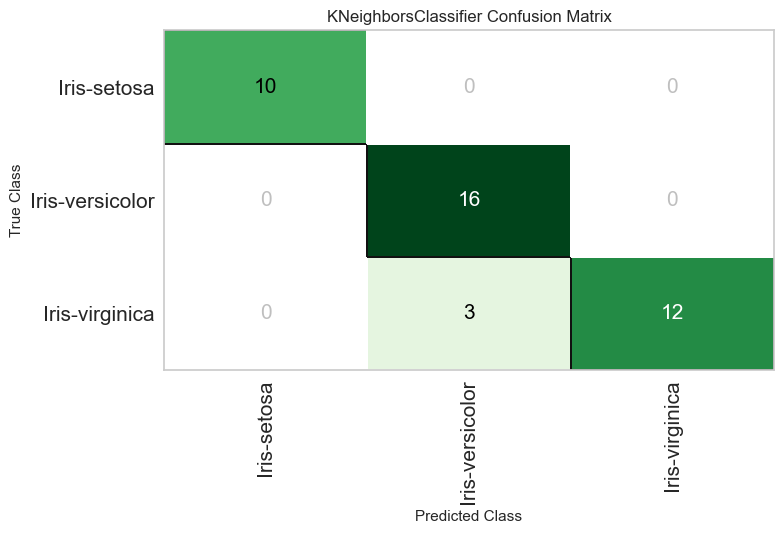

In [15]:
plot_model(tuned_knn, plot='confusion_matrix')

#### 10.2 Classification Report（分類レポート）

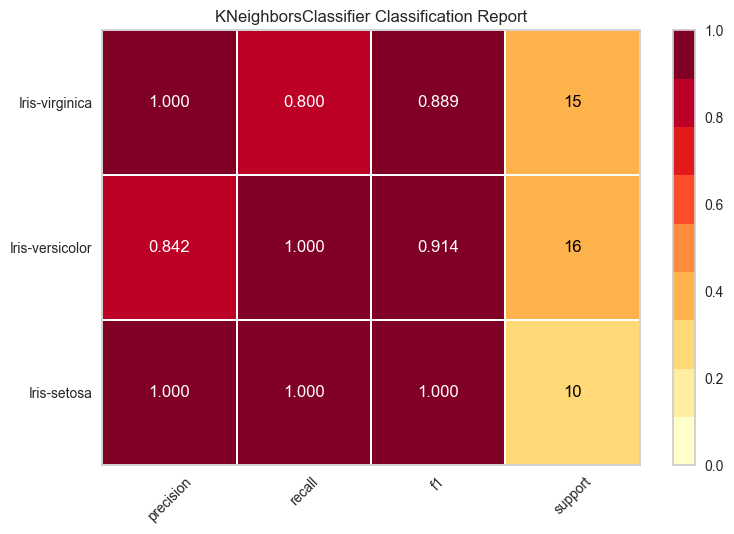

In [16]:
plot_model(tuned_knn, plot='class_report')

#### 10.3 Decision Boundary Plot（決定境界プロット）

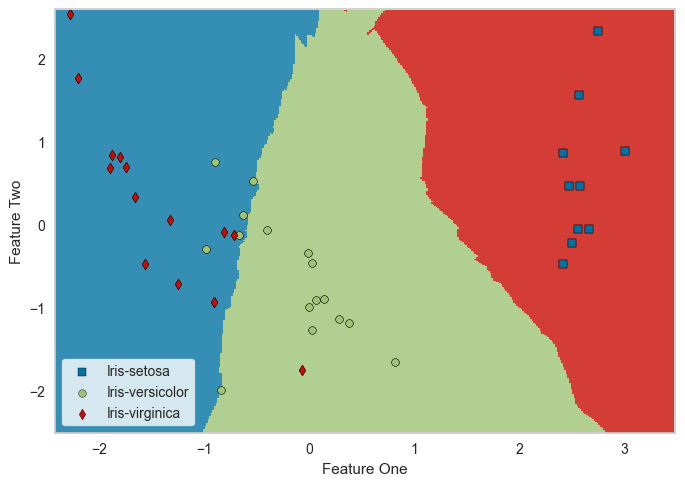

In [17]:
plot_model(tuned_knn, plot='boundary')

#### 10.4 Prediction Error Plot（予測誤差プロット）

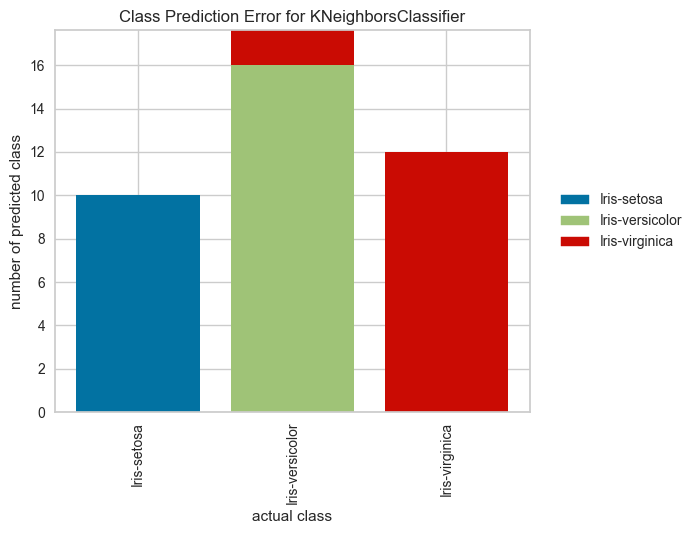

In [18]:
plot_model(tuned_knn, plot='error')

Another way to analyze the performance of models is to use the `evaluate_model()` function which displays a user interface for all of the available plots for a given model. It internally uses the `plot_model()` function.

モデルの性能を分析するもう一つの方法は、与えられたモデルに対して利用可能なすべてのプロットのためのユーザーインターフェースを表示する `evaluate_model()` 関数を使用することです。これは、内部的に `plot_model()` 関数を使用しています。

In [ ]:
evaluate_model(tuned_knn)

### 11.0 Predict on test / hold-out Sample

Before finalizing the model, it is advisable to perform one final check by predicting the test/hold-out set and reviewing the evaluation metrics. If you look at the information grid in Section 6 above, you will see that 30% (41 samples) of the data has been separated out as a test/hold-out sample. All of the evaluation metrics we have seen above are cross validated results based on the training set (70%) only. Now, using our final trained model stored in the `tuned_knn` variable we will predict against the hold-out sample and evaluate the metrics to see if they are materially different than the CV results.

### 11.0 テスト/ホールドアウト・サンプルでの予測

モデルを最終決定する前に、テスト/ホールドアウト・セットを予測して評価指標を確認することで、最終チェックを行うことをお勧めします。上記セクション6の情報グリッドを見ると、データの30%（41サンプル）がテスト/ホールドアウト・サンプルとして分離されていることがわかります。上記で見た評価指標はすべて、トレーニングセット（70％）のみに基づいたクロスバリデーションの結果です。ここで、`tuned_knn`変数に格納された最終的な学習済みモデルを用いて、ホールドアウトサンプルに対して予測を行い、CV結果と大きく異なるかどうか、メトリクスを評価します。

In [19]:
predict_model(tuned_knn)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9268,0.9761,0.9333,0.9384,0.9259,0.8879,0.8953


,sepal_length,sepal_width,petal_length,petal_width,species,Label,Score
0,5.7,2.6,3.5,1.0,Iris-versicolor,Iris-versicolor,0.8788
1,5.2,3.5,1.5,0.2,Iris-setosa,Iris-setosa,1.0000
2,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica,0.6667
3,4.8,3.4,1.9,0.2,Iris-setosa,Iris-setosa,1.0000
4,7.0,3.2,4.7,1.4,Iris-versicolor,Iris-versicolor,0.5152
5,5.5,2.6,4.4,1.2,Iris-versicolor,Iris-versicolor,0.7879
6,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa,1.0000
7,4.6,3.6,1.0,0.2,Iris-setosa,Iris-setosa,1.0000
8,5.1,3.8,1.6,0.2,Iris-setosa,Iris-setosa,1.0000
9,5.8,2.7,3.9,1.2,Iris-versicolor,Iris-versicolor,0.8788


The accuracy on the test/hold-out set is `0.9512` compared to `0.9356` achieved on the `tuned_knn` CV results (in section 9.2 above). This is not a significant difference. If there is a large variation between the test/hold-out and CV results, then this would normally indicate over-fitting but could also be due to several other factors and would require further investigation. In this case, we will move forward with finalizing the model and predicting on unseen data (the 10% that we had separated in the beginning and never exposed to PyCaret).

(TIP : It's always good to look at the standard deviation of CV results when using `create_model()`.)

テスト/ホールドアウトセットでの精度は `0.9512` で， `tuned_knn` CV の結果 (上記 9.2 節) で達成した `0.9356` と比べても，大きな差はありません．これは有意な差ではありません．もしテスト/ホールドアウトとCV結果の間に大きな差がある場合、これは通常オーバーフィッティングを示しますが、ほかのいくつかの要因による可能性もあり、さらなる調査が必要となります。この場合、モデルを確定し、未見のデータ（最初に分離した10%のデータで、PyCaretにさらされることがなかったもの）で予測することに進みます。

(TIP : `create_model()` を使うときに CV の結果の標準偏差を見るのは常に良いことです。)

### 12.0 Finalize Model for Deployment

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with `setup()`, followed by comparing all models using `compare_models()` and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The `finalize_model()` function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

### 12.0 展開のためのモデルの最終化

モデルの確定は、実験の最後のステップです。PyCaret の通常の機械学習ワークフローは `setup()` から始まり、次に `compare_models()` を使ってすべてのモデルを比較し、ハイパーパラメータチューニング、アンサンブル、スタッキングなどのいくつかのモデリング技術を実行するために（関心のあるメトリックに基づいて）いくつかの候補モデルをショートリスト化します。このワークフローは最終的に、新しいデータや未知のデータに対して予測を行う際に使用する最適なモデルを導き出します。`finalize_model()` 関数は、テスト/ホールドアウトサンプル（この例では30%）を含む完全なデータセットにモデルを当てはめます。この関数の目的は、実運用に投入する前に、完全なデータセットでモデルを学習させることです。

In [20]:
final_knn = finalize_model(tuned_knn)
# 15s

In [21]:
# Final K Nearest Neighbor parameters for deployment
# 最終的な K最近傍 パラメータの展開
print(final_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=33, p=2,
                     weights='uniform')


### 13.0 Predict on unseen data

The `predict_model()` function is also used to predict on the unseen dataset. The only difference from section 11 above is that this time we will pass the `data_unseen` parameter. `data_unseen` is the variable created at the beginning of the tutorial and contains 10% (15 samples) of the original dataset which was never exposed to PyCaret. (see section 5 for explanation)

### 13.0 未使用のデータで予測する

`predict_model()` 関数は、未使用のデータセットに対して予測を行うためにも使用されます。上記セクション11との唯一の違いは、今回は `data_unseen` パラメータを渡すことです。`data_unseen` はチュートリアルの最初に作成した変数で、PyCaret に公開されていないオリジナルのデータセットの 10% (15 サンプル) が格納されています。(説明はセクション5を参照してください)

In [22]:
unseen_predictions = predict_model(final_knn, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.0000,1.0000,0,0,0,0,0


,sepal_length,sepal_width,petal_length,petal_width,species,Label,Score
0,5.4,3.9,1.7,0.4,Iris-setosa,Iris-setosa,1.0000
1,5.4,3.4,1.7,0.2,Iris-setosa,Iris-setosa,1.0000
2,5.1,3.3,1.7,0.5,Iris-setosa,Iris-setosa,1.0000
3,4.8,3.1,1.6,0.2,Iris-setosa,Iris-setosa,1.0000
4,6.9,3.1,4.9,1.5,Iris-versicolor,Iris-versicolor,0.5455


The `Label` and `Score` columns are added onto the `data_unseen` set. Label is the prediction and score is the probability of the prediction. Notice that predicted results are concatenated to the original dataset while all the transformations are automatically performed in the background.

`Label` と `Score` のカラムは `data_unseen` セットに追加される。Label は予測値、Score は予測値の確率です。予測された結果は元のデータセットに連結され、すべての変換はバックグラウンドで自動的に行われることに注意してください。

### 14.0 Saving the model

We have now finished the experiment by finalizing the `tuned_knn` model which is now stored in the `final_knn` variable. We have also used the model stored in `final_knn` to predict `data_unseen`. This brings us to the end of our experiment, but one question is still to be asked: What happens when you have more new data to predict? Do you have to go through the entire experiment again? The answer is no, PyCaret's inbuilt function `save_model()` allows you to save the model along with entire transformation pipeline for later use.

### 14.0 モデルの保存

これで、`tuned_knn`モデルを確定して実験を終了し、`final_knn`変数に格納されました。また、`final_knn`に格納されたモデルを使用して、`data_unseen`を予測しました。これで実験は終了ですが、まだ1つ疑問が残ります。予測すべき新しいデータが増えたらどうなるのでしょうか？この実験をもう一度やり直す必要があるのでしょうか？答えはノーです。PyCaretの組み込み関数 `save_model()` を使えば、変換パイプライン全体と一緒にモデルを保存して、あとで使うことができます。

In [23]:
save_model(final_knn,'Final_KNN_Model_06Nov2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='species',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('fix_perfect', Remove_100(target='species')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
        

(TIP : It's always good to use date in the filename when saving models, it's good for version control.)

(TIP : モデルを保存するとき、ファイル名に日付を使うのは常に良いことです。バージョン管理にも役立ちます)

### 15.0 Loading the saved model

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's `load_model()` function and then easily apply the saved model on new unseen data for prediction.

### 15.0 保存されたモデルのロード

保存したモデルを将来同じ環境または別の環境でロードするには、PyCaret の `load_model()` 関数を使用し、保存したモデルを新しい未見のデータに簡単に適用して予測することになります。

In [24]:
saved_final_knn = load_model('Final_KNN_Model_06Nov2022')

Transformation Pipeline and Model Successfully Loaded


Once the model is loaded in the environment, you can simply use it to predict on any new data using the same `predict_model()` function. Below we have applied the loaded model to predict the same `data_unseen` that we used in section 13 above.

一旦モデルが環境にロードされると、同じ `predict_model()` 関数を使用して新しいデータを予測するためにそれを使用することができます。以下では、ロードされたモデルを、上記のセクション13で使用したのと同じ `data_unseen` を予測するために適用しています。

In [25]:
new_prediction = predict_model(saved_final_knn, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.0000,1.0000,0,0,0,0,0


In [26]:
new_prediction.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Label,Score
0,5.4,3.9,1.7,0.4,Iris-setosa,Iris-setosa,1.0000
1,5.4,3.4,1.7,0.2,Iris-setosa,Iris-setosa,1.0000
2,5.1,3.3,1.7,0.5,Iris-setosa,Iris-setosa,1.0000
3,4.8,3.1,1.6,0.2,Iris-setosa,Iris-setosa,1.0000
4,6.9,3.1,4.9,1.5,Iris-versicolor,Iris-versicolor,0.5455


Notice that the results of `unseen_predictions` and `new_prediction` are identical.

`unseen_predictions` と `new_prediction` の結果が同じであることに注意してください。

### 16.0 Wrap-up / Next Steps?

This tutorial has covered the entire machine learning pipeline from data ingestion, pre-processing, training the model, hyperparameter tuning, prediction and saving the model for later use. We have completed all of these steps in less than 10 commands which are naturally constructed and very intuitive to remember such as `create_model()`, `tune_model()`, `compare_models()`. Re-creating the entire experiment without PyCaret would have taken well over 100 lines of code in most libraries.

We have only covered the basics of `pycaret.classification`. In following tutorials we will go deeper into advanced pre-processing, ensembling, generalized stacking and other techniques that allow you to fully customize your machine learning pipeline and are must know for any data scientist.

### 16.0 まとめ／次のステップは？

このチュートリアルでは、データの取り込みから前処理、モデルの学習、ハイパーパラメータのチューニング、予測、あとで使用するモデルの保存まで、機械学習パイプライン全体をカバーしました。これらのステップは10個以下のコマンドで完結しており、それらは `create_model()`, `tune_model()`, `compare_models()` など、自然に構成されていて非常に直感的に覚えることができます。PyCaretなしで実験全体を再作成すると、ほとんどのライブラリで100行を優に超えるコードが必要だったでしょう。

ここまでで、`pycaret.classification`の基本的な部分のみをカバーしました。次のチュートリアルでは、高度な前処理、アンサンブル、一般化スタッキング、そして機械学習パイプラインを完全にカスタマイズすることができる、データサイエンティストなら必ず知っておくべきその他のテクニックに深く踏み込んでいきます。